In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/MyDrive/Code/

/content/gdrive/MyDrive/Code


In [3]:
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')


# Import packages and modules
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a dataframe
import re
from nltk.stem.snowball import SnowballStemmer


import pandas as pd
import numpy as np
from string import punctuation
from collections import Counter
import re
from nltk.tokenize import regexp_tokenize , word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy

import codecs
import os
import random

import string
# from hazm import Lemmatizer , Normalizer
# from hazm import Normalizer as hazm_norm
# from parsivar import Tokenizer , FindStems

import sklearn as sk
import nltk
import matplotlib.pyplot as plt
import re
import seaborn as sns
from nltk.tokenize import regexp_tokenize , word_tokenize 
# from nltk.tokenize import MWETokenizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from hazm import Normalizer, Lemmatizer, WordTokenizer, InformalNormalizer


import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
stop = stopwords.words('english')



import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()


from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##Data


#####Dataset:  17743 rows × 5 columns
#####Uniqu drug Number :  1616
#####Unique question Number:  139

In [15]:
import pandas as pd
df = pd.read_csv('drug_dataset.csv')
df = pd.DataFrame(df)
# df.head(3)
content = df['title']
df['title'] = content 
df['title']
# contect.head(3)

0                       Why is this medication prescribed?
1                        How should this medicine be used?
2                             Other uses for this medicine
3                What special precautions should I follow?
4        What special dietary instructions should I fol...
                               ...                        
17738                What other information should I know?
17739                                          Brand names
17740                        In case of emergency/overdose
17741                What other information should I know?
17742                                          Brand names
Name: title, Length: 17743, dtype: object

In [ ]:
df.head(3)

,Section_Number,Link,drug_name,title,text
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...
2,3,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Other uses for this medicine,This medication may be prescribed for other us...


##Preprocess

#####Lower 
#####Remove punc
#####Remove stop word
#####Stemming

In [16]:
df["question"] = df["title"].str.lower()#.str.split()
df["question"] = df["question"].str.replace('[^\w\s]',' ')
df["question"]

0                       why is this medication prescribed 
1                        how should this medicine be used 
2                             other uses for this medicine
3                what special precautions should i follow 
4        what special dietary instructions should i fol...
                               ...                        
17738                what other information should i know 
17739                                          brand names
17740                        in case of emergency overdose
17741                what other information should i know 
17742                                          brand names
Name: question, Length: 17743, dtype: object

In [17]:
custom_stop_word_list = ['whi']
stop = custom_stop_word_list + stop

df["question"] = df["question"].apply(lambda x: [item for item in w_tokenizer.tokenize(x) if item not in stop])
df["question"]

0                        [medication, prescribed]
1                                [medicine, used]
2                                [uses, medicine]
3                  [special, precautions, follow]
4        [special, dietary, instructions, follow]
                           ...                   
17738                         [information, know]
17739                              [brand, names]
17740                 [case, emergency, overdose]
17741                         [information, know]
17742                              [brand, names]
Name: question, Length: 17743, dtype: object

In [18]:
import pandas as pd
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")
# df["stemmed"] = df["title"].str.split()
df['question'] = df["question"].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

# df = df.drop(columns=['stemmed']) # Get rid of the unstemmed column.
df['question']

0                           [medic, prescrib]
1                              [medicin, use]
2                              [use, medicin]
3                  [special, precaut, follow]
4        [special, dietari, instruct, follow]
                         ...                 
17738                          [inform, know]
17739                           [brand, name]
17740                  [case, emerg, overdos]
17741                          [inform, know]
17742                           [brand, name]
Name: question, Length: 17743, dtype: object

In [ ]:
df.head(3)

,Section_Number,Link,drug_name,title,text,question
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,"[medic, prescrib]"
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,"[medicin, use]"
2,3,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Other uses for this medicine,This medication may be prescribed for other us...,"[use, medicin]"


In [19]:
tokenized_docss = []
def _remove(text):
    s = " "
    s = s.join(text) 
    return (s)

z = df['question'].apply(_remove)
df['question'] = pd.DataFrame(z)
df['question'].head(3)

0    medic prescrib
1       medicin use
2       use medicin
Name: question, dtype: object

In [20]:
x = df.iloc[:,5]
# x = df
print(x.shape)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Create the vectorizer
x_tfidf = TfidfVectorizer().fit(x).transform(x)
tfidf_vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.75)
tfidf = tfidf_vectorizer.fit_transform(df.question.values)
terms = tfidf_vectorizer.get_feature_names()
print(tfidf_vectorizer.get_feature_names()[:10])
print(len(tfidf_vectorizer.get_feature_names()))
print(tfidf.shape)


print("tfidf shape: ",tfidf.shape , type(tfidf) )
print("terms",len(terms),type(terms))  #list of words

(17743,)
['follow', 'know', 'medic', 'medicin', 'name', 'special', 'use']
7
(17743, 7)
tfidf shape:  (17743, 7) <class 'scipy.sparse.csr.csr_matrix'>
terms 7 <class 'list'>


In [ ]:
x_tfidf.shape

(17743, 119)

###########################################

##Find best n for cluster
#Elbow Method

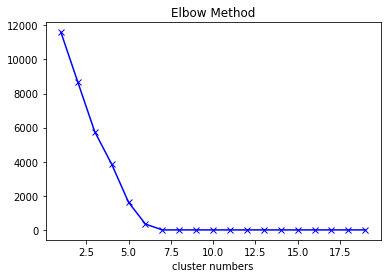

In [ ]:
# Using elbow method to determine number of cluster
from sklearn.cluster import MiniBatchKMeans

K = range(1,20)
SSE = []
for k in K:
    kmeans = MiniBatchKMeans(n_clusters = k, batch_size = 50)
    kmeans.fit(tfidf)
    SSE.append(kmeans.inertia_)
    
plt.plot(K,SSE,'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

In [ ]:
clust=MiniBatchKMeans(n_clusters=6, batch_size=50)
clust.fit(tfidf)  
centers = clust.cluster_centers_.argsort()[:,::-1]

In [ ]:
type(centers) , centers.shape #Yani 6 ta claster dar har celaster 7 ta dacument mojood hast

In [ ]:
centers

In [ ]:
len(centers[0])

In [ ]:
centers[0,:15]
centers[1,:15]

array([2, 6, 5, 4, 3, 1, 0])

In [23]:
from sklearn.cluster import KMeans

# Using MiniBatchKMean to cluster
n_clusters = 6 

# for nc in n_clusters:
clust = KMeans(n_clusters=n_clusters,max_iter=100,precompute_distances="auto",n_jobs=-1)
clust.fit(tfidf)
centers = clust.cluster_centers_.argsort()[:,::-1]
print("Len of Labels: ",len(set(clust.labels_)), " Params: ", clust.get_params())
for i in range(0,n_clusters):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list) 
# evaluate(clust, tfidf)

Len of Labels:  6  Params:  {'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 6, 'n_init': 10, 'n_jobs': -1, 'precompute_distances': 'auto', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
cluster0:
['name', 'use', 'special', 'medicin', 'medic', 'know', 'follow']
cluster1:
['use', 'special', 'name', 'medicin', 'medic', 'know', 'follow']
cluster2:
['know', 'medic', 'use', 'special', 'name', 'medicin', 'follow']
cluster3:
['medicin', 'use', 'special', 'name', 'medic', 'know', 'follow']
cluster4:
['special', 'follow', 'use', 'name', 'medicin', 'medic', 'know']
cluster5:
['medic', 'use', 'special', 'name', 'medicin', 'know', 'follow']


In [ ]:
# Using MiniBatchKMean to cluster
n_clusters = 6 
nc = n_clusters
init = ['k-means++']

# for nc in n_clusters:
for ini in init:
    clust=MiniBatchKMeans(n_clusters=nc, init=ini, batch_size=50)
    clust.fit(tfidf)
    centers = clust.cluster_centers_.argsort()[:,::-1]
    print("Len of Labels: ",len(set(clust.labels_)), " Params: ", clust.get_params())
    for i in range(0,nc):
        word_list=[]
        print("cluster%d:"% i)
        for j in centers[i,:15]:
            word_list.append(terms[j])
        print(word_list) 
    # evaluate(clust, tfidf)

Len of Labels:  6  Params:  {'batch_size': 50, 'compute_labels': True, 'init': 'k-means++', 'init_size': None, 'max_iter': 100, 'max_no_improvement': 10, 'n_clusters': 6, 'n_init': 3, 'random_state': None, 'reassignment_ratio': 0.01, 'tol': 0.0, 'verbose': 0}
cluster0:
['know', 'medic', 'use', 'special', 'name', 'medicin', 'follow']
cluster1:
['use', 'special', 'name', 'medicin', 'medic', 'know', 'follow']
cluster2:
['medicin', 'use', 'special', 'name', 'medic', 'know', 'follow']
cluster3:
['follow', 'special', 'use', 'name', 'medicin', 'medic', 'know']
cluster4:
['medic', 'use', 'special', 'name', 'medicin', 'know', 'follow']
cluster5:
['name', 'use', 'special', 'medicin', 'medic', 'know', 'follow']


##Kmeand & Visualize
https://stackoverflow.com/questions/27494202/how-do-i-visualize-data-points-of-tf-idf-vectors-for-kmeans-clustering

['follow', 'know', 'medic', 'medicin', 'name', 'special', 'use']
7
(17743, 7)


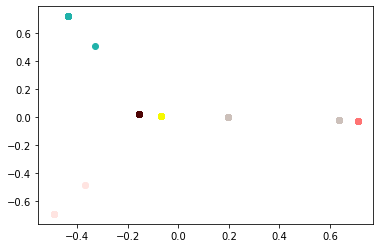

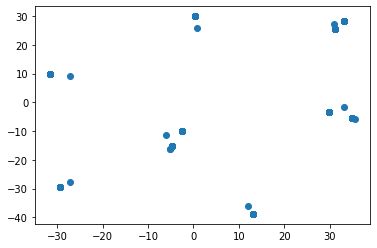

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

num_clusters = 6
num_seeds = 10
max_iterations = 100
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#f6f900', 4: '#4d0404',
    5: '#ccc0ba'#, 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

# texts_list = some array of strings for which TF-IDF is being computed

# calculate tf-idf of texts
# tf_idf_vectorizer = TfidfVectorizer(analyzer="word", use_idf=True, smooth_idf=True, ngram_range=(2, 3))
x_tfidf = TfidfVectorizer().fit(df.question.values).transform(df.question.values)
tf_idf_vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.75)
tf_idf_matrix = tf_idf_vectorizer.fit_transform(df.question.values)
terms = tf_idf_vectorizer.get_feature_names()
print(tf_idf_vectorizer.get_feature_names()[:10])
print(len(tf_idf_vectorizer.get_feature_names()))
print(tf_idf_matrix.shape)
# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(tf_idf_matrix)
print("Lables: ",labels )
# print labels

X = tf_idf_matrix.todense()

# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
print("reduced_data: ", reduced_data)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()



# t-SNE plot
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()

https://stackoverflow.com/questions/57626286/how-to-plot-text-clusters

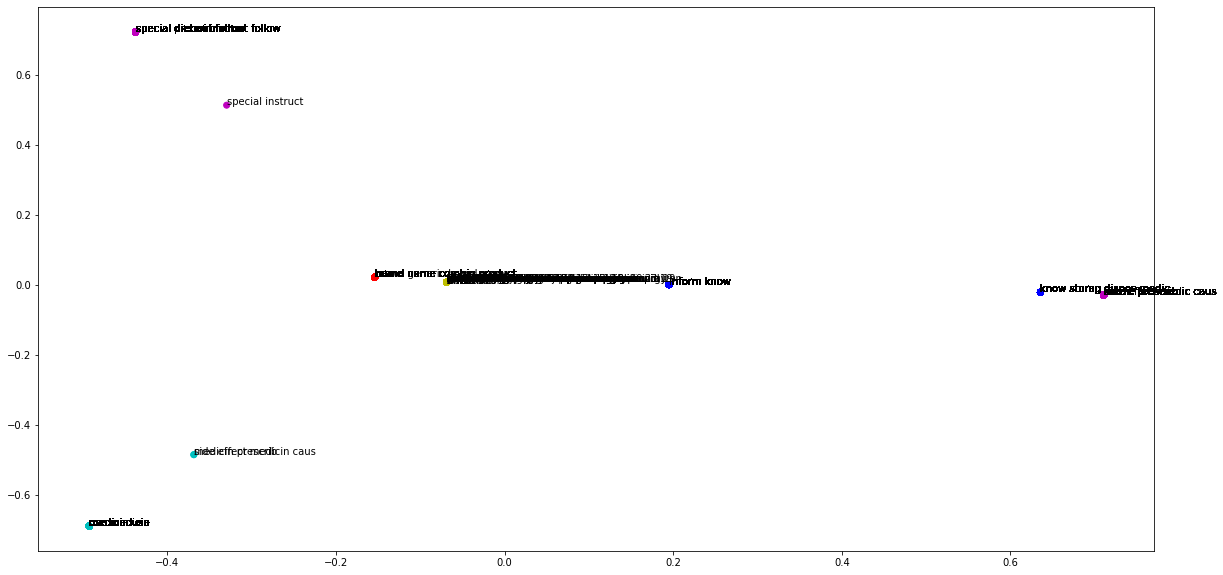

In [ ]:
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


x_tfidf = TfidfVectorizer().fit(df.question.values).transform(df.question.values)
tf_idf_vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.75)
vectors = tf_idf_vectorizer.fit_transform(df.question.values)

# vectors = cv.fit_transform(tf_idf_vectorizer)
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 0)
kmean_indices = kmeans.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = ["r", "b", "c", "y", "m", "g" ]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

for i, txt in enumerate(x):
    ax.annotate(txt, (x_axis[i], y_axis[i]))

##Data Lablelling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
df["intent"] = ""

# Initializing KMeans
kmeans = KMeans(n_clusters=6)
# Fitting with inputs
kmeans = kmeans.fit(tf_idf_matrix)
# Predicting the clusters
labels = kmeans.predict(tf_idf_matrix)
print("Lables: ", len(labels) )
for i in range(len(labels)):
  df["intent"][i]  = labels[i]
  print(df.title[i] , labels[i]) 
# Getting the cluster centers

print("**************************************************")
# C = kmeans.cluster_centers_
# print((C))

########################################################### 

# fig = plt.figure()
# ax = Axes3D(fig)
# # ax.scatter(tf_idf_matrix[:, 0], tf_idf_matrix[:, 1], tf_idf_matrix[:, 2], c=Y)
# ax.scatter(C[:, 0], C[:, 1], C[:,4], marker="*", c="#050505", s=1000)

Lables:  17743
Why is this medication prescribed? 3
How should this medicine be used? 4
Other uses for this medicine 4
What special precautions should I follow? 0
What special dietary instructions should I follow? 0
What should I do if I forget a dose? 2
What side effects can this medication cause? 3
Why is this medication prescribed? 3
How should this medicine be used? 4
Other uses for this medicine 4
What special precautions should I follow? 0
What special dietary instructions should I follow? 0
What side effects can this medication cause? 3
In case of emergency/overdose 2
What other information should I know? 1
IMPORTANT WARNING:  2
Why is this medication prescribed? 3
How should this medicine be used? 4
Other uses for this medicine 4
What special precautions should I follow? 0
What special dietary instructions should I follow? 0
What side effects can this medication cause? 3
Why is this medication prescribed? 3
How should this medicine be used? 4
Other uses for this medicine 4
What

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Streaming output truncated to the last 5000 lines.
IMPORTANT WARNING:  2
Why is this medication prescribed? 3
How should this medicine be used? 4
Other uses for this medicine 4
What special precautions should I follow? 0
Why is this medication prescribed? 3
How should this medicine be used? 4
Other uses for this medicine 4
What special precautions should I follow? 0
How should this medicine be used? 4
Other uses for this medicine 4
What special precautions should I follow? 0
What special dietary instructions should I follow? 0
What should I do if I forget a dose? 2
What side effects can this medication cause? 3
What should I know about storage and disposal of this medication? 1
In case of emergency/overdose 2
What other information should I know? 1
What should I know about storage and disposal of this medication? 1
In case of emergency/overdose 2
What other information should I know? 1
Brand names 5
Why is this medication prescribed? 3
In case of emergency/overdose 2
What other informa

In [ ]:
df.head(3)

,Section_Number,Link,drug_name,title,text,question,intent
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib,3
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use,4
2,3,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Other uses for this medicine,This medication may be prescribed for other us...,use medicin,4


['follow', 'know', 'medic', 'medicin', 'name', 'special', 'use']
7
(17743, 7)
Th0class---------------------
Brand names
Th1class---------------------
What other information should I know?
Th2class---------------------
What special precautions should I follow?
Th3class---------------------
What should I do if I forget a dose?
Th4class---------------------
How should this medicine be used?
Th5class---------------------
Why is this medication prescribed?





([], <a list of 0 Text major ticklabel objects>)

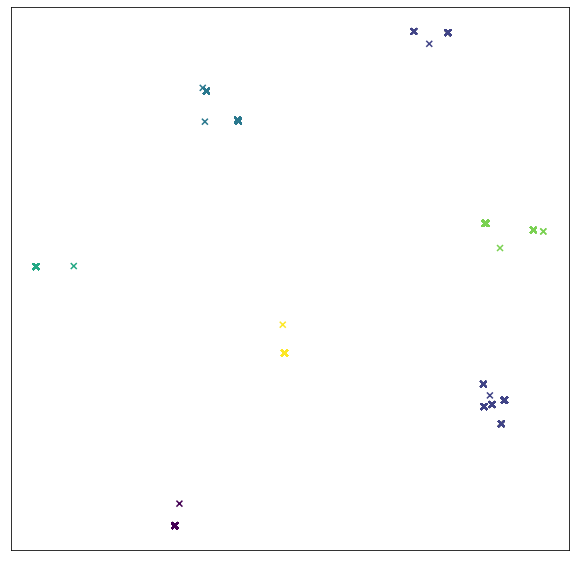

In [ ]:
# coding: utf-8
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
#Clustering data preparation, string matrix
# corpus=[]
# titles=[]
# with open(r"D:\Neo4j\know——get\pyltp_jufafenxi\quchogfu.txt",encoding="utf-8") as fr:
#    for lin in fr:
#        if "SOL" not in lin and "O O" not in lin and "I-SOL" not in lin:
#            lin=lin.replace("{","")
#            lin = lin.replace("'SOL'", "")
#            lin = lin.replace(":", "")
#            lin = lin.replace("\'", "")
#            lin = lin.replace("[", "")
#            lin = lin.replace("}", "")
#            lin = lin.replace("]", "")
#            lin = lin.replace("\n", "")
#            corpus.append(lin)
#            titles.append(lin[0:5])

#Convert the words in the text to the word frequency matrix
# x_tfidf = TfidfVectorizer().fit(df.question.values).transform(df.question.values)

xx = df.iloc[:,5]
tf_idf_vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.75)
X = tf_idf_vectorizer.fit_transform(xx)
word = tf_idf_vectorizer.get_feature_names()
print(tf_idf_vectorizer.get_feature_names()[:10])
print(len(tf_idf_vectorizer.get_feature_names()))
print(tf_idf_matrix.shape)







# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(df.question.values)#Get all text keywords in bag of words
# word = vectorizer.get_feature_names()

transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)# Will word frequency matrix X statistics into TF-IDF value #View data structure tfidf[i][j] represents the tf-idf weight in the i type text
weight = tfidf.toarray()

# kmeans clustering
kmeans = KMeans(n_clusters=6, random_state=0).fit(weight)#k value can be set by yourself, not necessarily five types
centroid_list = kmeans.cluster_centers_  #Clustering center
labels = kmeans.labels_   #Clustering tags
n_clusters_ = len(centroid_list)

max_centroid = 0
max_cluster_id = 0
cluster_menmbers_list = []
for i in range(0, n_clusters_):
    menmbers_list = []
    for j in range(0, len(labels)):
        if labels[j] == i:
            menmbers_list.append(j)
    cluster_menmbers_list.append(menmbers_list)

# Clustering results
for i in range(0,len(cluster_menmbers_list)):
    print ('Th' + str(i) + 'class' + '---------------------')
    for j in range(0,len(cluster_menmbers_list[i])):
       a = cluster_menmbers_list[i][j]
       print (df['title'][a])
       break

print('\n\n')
#Scatter graph data preparation, TSNE dimensionality reduction, weight is tf-idf matrix weight = tfidf.toarray(),
tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(weight)
x = []
y = []
for i in decomposition_data:
    x.append(i[0])
    y.append(i[1])
# Scatter plot representation of clustering results
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(x, y, c=kmeans.labels_, marker="x")#plt plt.scatterDraw a scatter plot
plt.xticks(()) #What is the use of #xticks, in fact, I want to make the coordinate axis look like I want
plt.yticks(())
# for i in range(len(x)):
#     plt.annotate(titles[i], xy=(x[i], y[i]), xytext=(x[i] + 0.1, y[i] + 0.1))  #plt.annotate add Chinese annotations to the scatter plot, where xy is the coordinate to be marked, and xytext is the corresponding label coordinate
# plt.show()


In [6]:
df.to_csv('Kmeans_intent.csv')

In [13]:
import pandas as pd
df = pd.read_csv('Kmeans_intent.csv')
df = pd.DataFrame(df)
df.head(3)

,Unnamed: 0,Section_Number,Link,drug_name,title,text,question,intent
0,0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib,3
1,1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use,4
2,2,3,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Other uses for this medicine,This medication may be prescribed for other us...,use medicin,4


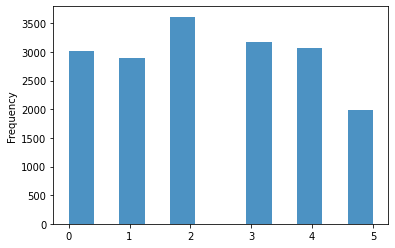

In [14]:
ax = df['intent'].plot.hist(bins=12, alpha=0.8)